In [1]:
import os
import time
import pickle
import codecs
import matplotlib

import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [2]:
results = ["avg", "min", "max", "concat"]
sgm = {}
eam = {}

In [3]:
for method in results:
    with codecs.open('results_'+str(method)+'/skipgram.pkl', 'rb') as s:
        sgm[method] = pickle.load(s)
    with codecs.open('results_'+str(method)+'/embed_align.pkl', 'rb') as e:
        eam[method] = pickle.load(e)

In [4]:
def splitting(model_dict):
    STS = {}
    ClassificationTask = {}
    STS_updated_dict = {}
    
    # splitting
    for key, value in model_dict.items():
        for task, scores in value.items():
            if task.find("STS") == 0 or task.find("Relatedness") > 0:
                STS[key, task] = model_dict[key][task]
            else:
                ClassificationTask[key, task] = model_dict[key][task]
    
    
    for key, subtasks in STS.items():
        for sets, scores in subtasks.items():
            if sets == 'pearson':
                STS_updated_dict[key] = {'pearson': scores * 100}
            try:
                if isinstance(scores['pearson'], dict):
                    STS_updated_dict[key] = {'pearson': scores['pearson']['mean'] * 100}
            except:
                continue
    
    
    # dataframes
    ClassificationTask_df = pd.DataFrame.from_dict(ClassificationTask, orient = 'index')
    ClassificationTask_df = ClassificationTask_df.drop(columns = ['ndev', 'ntest', 'devacc', 'f1'])
    
    STS_updated_df = pd.DataFrame.from_dict(STS_updated_dict, orient = 'index')
    
    return STS_updated_df, ClassificationTask_df

In [5]:
STS_sgm, ClassificationTask_sgm = splitting(sgm)
STS_eam, ClassificationTask_eam = splitting(eam)

In [6]:
pprint(STS_sgm)
print('*'*25)
pprint(STS_eam)

                pearson
avg    STS14  57.743089
concat STS14  60.011122
max    STS14  59.190883
min    STS14  59.638933
*************************
                pearson
avg    STS14  58.133807
concat STS14  60.707121
max    STS14  53.454594
min    STS14  54.791598


In [7]:
pprint(ClassificationTask_eam)
print('*'*32)
pprint(ClassificationTask_sgm)

                         acc
avg    CR              68.40
       MPQA            83.61
       MR              64.00
       MRPC            69.51
       SICKEntailment  73.41
       SST2            65.95
       SUBJ            78.26
       TREC            52.60
concat CR              70.99
       MPQA            85.06
       MR              64.79
       MRPC            71.59
       SICKEntailment  77.00
       SST2            67.98
       SUBJ            80.39
       TREC            59.40
max    CR              66.86
       MPQA            79.40
       MR              58.97
       MRPC            69.10
       SICKEntailment  68.93
       SST2            59.36
       SUBJ            71.62
       TREC            46.00
min    CR              68.56
       MPQA            83.00
       MR              61.64
       MRPC            71.07
       SICKEntailment  75.20
       SST2            63.21
       SUBJ            72.03
       TREC            48.80
********************************
          

In [8]:
plt.rcParams['figure.figsize'] = [16, 12]

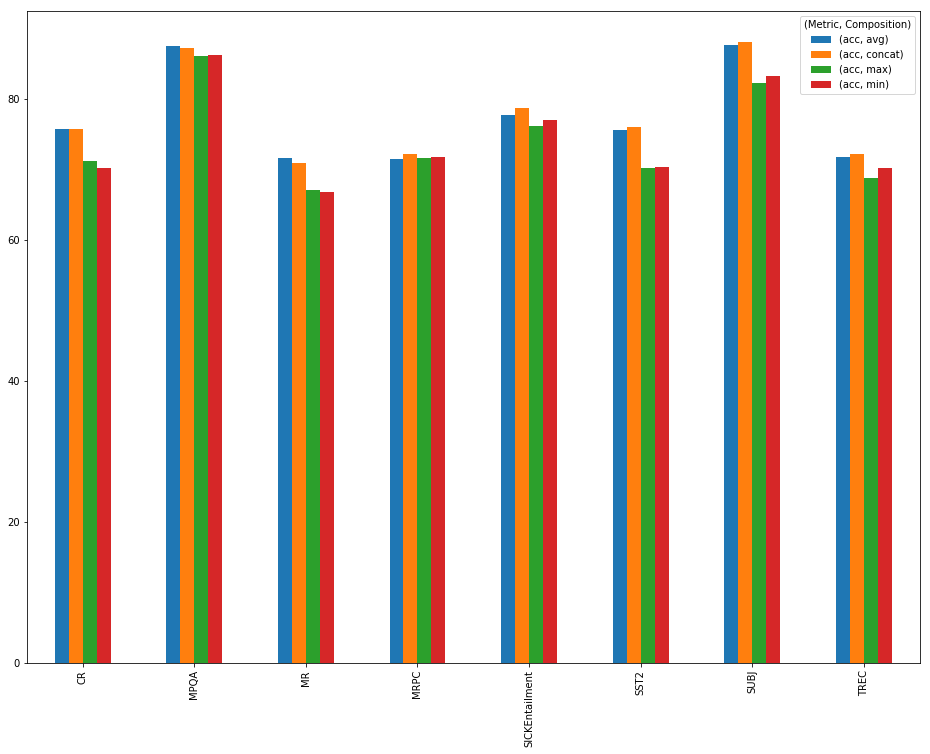

In [9]:
ClassificationTask_sgm.unstack(level=0).plot(kind='bar', subplots=False).legend(title = "(Metric, Composition)")
plt.show()

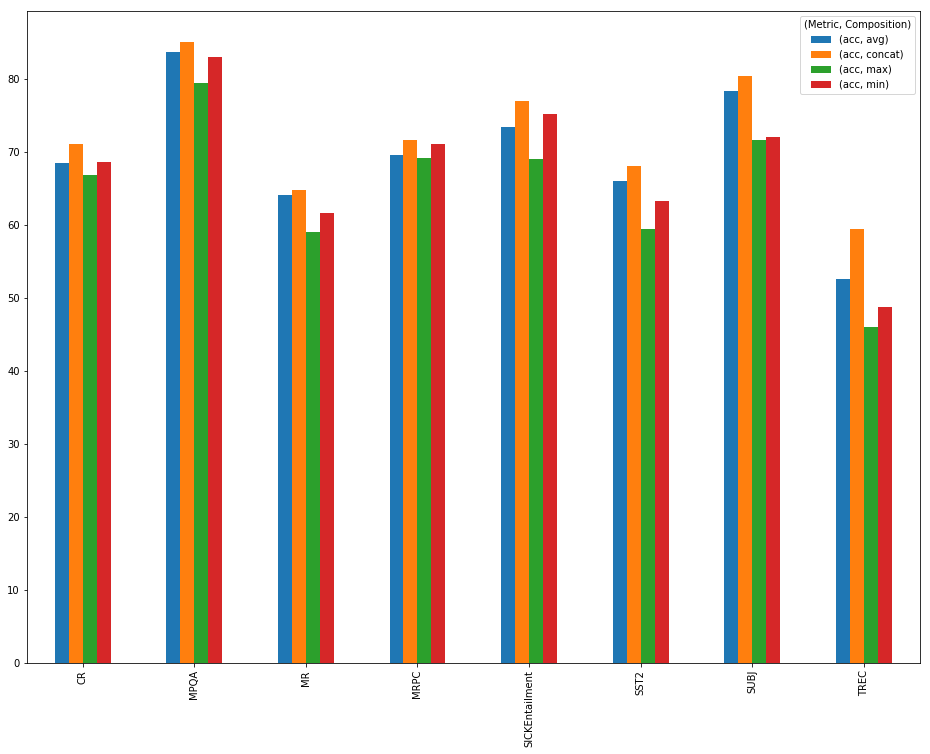

In [10]:
ClassificationTask_eam.unstack(level=0).plot(kind='bar', subplots=False).legend(title = "(Metric, Composition)")
plt.show()

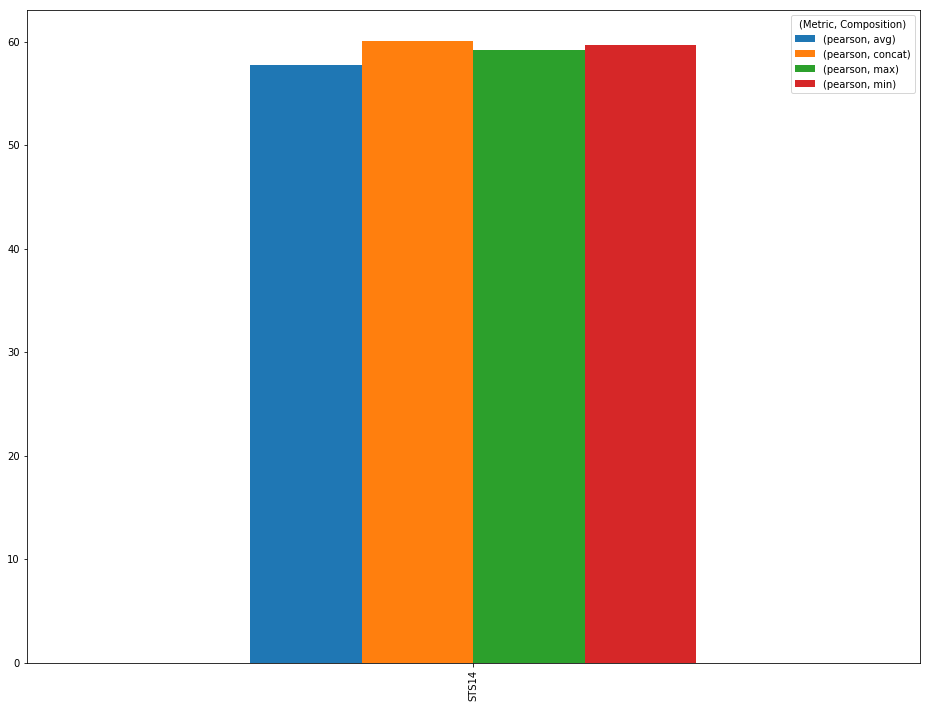

In [11]:
STS_sgm.unstack(level=0).plot(kind='bar', subplots=False).legend(title = "(Metric, Composition)")
plt.show()

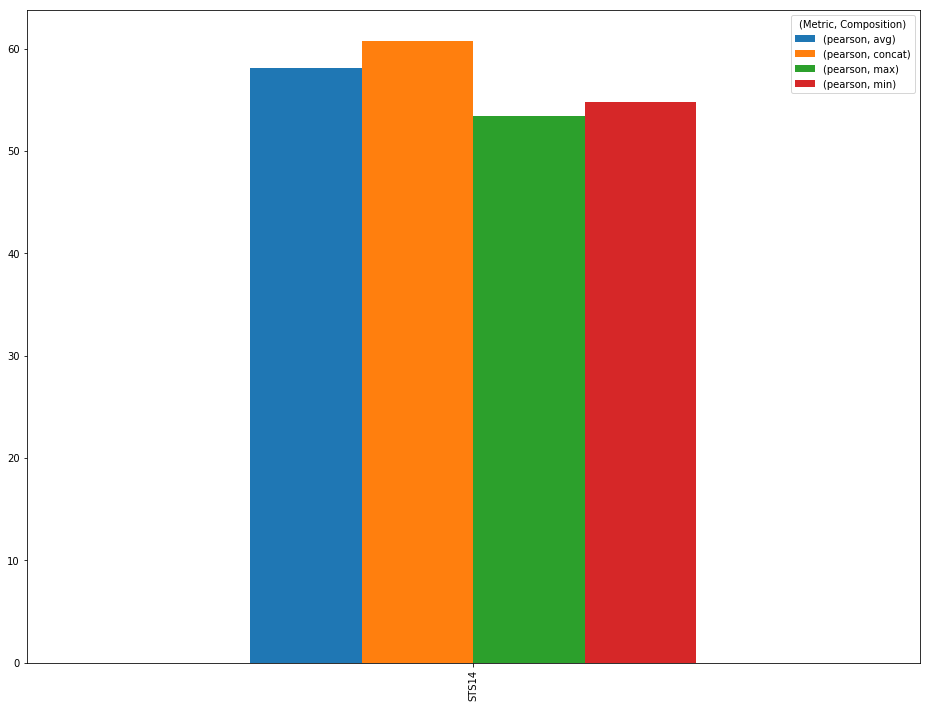

In [12]:
STS_eam.unstack(level=0).plot(kind='bar', subplots=False).legend(title = "(Metric, Composition)")
plt.show()

In [13]:
# STS_updated_dict = {}
# for key, subtasks in STS.items():
#     for sets, scores in subtasks.items():
#         if sets == 'pearson':
#             STS_updated_dict[key] = scores * 100
#         try:
#             if isinstance(scores['pearson'], dict):
#                 print((key, (scores['pearson']['mean'])))
#                 STS_updated_dict[key] = scores['pearson']['mean'] * 100
#         except:
#             continue

In [14]:
# for key, value in STS_dict.items():
#     sum_ = 0.0
#     for sets in value:
#         if isinstance(sets[1], dict):
#             if isinstance(sets[1]['pearson'], dict):
#                 print((key, (sets[1]['pearson']['mean'])))
#                 STS_updated_dict[key] = sets[1]['pearson']['mean'] * 100
#         elif isinstance(sets[1], np.float64):
#             sum_ += sets[1]
#     avg = sum_*100/len(value) 
#     if key not in STS_updated_dict.keys():
#         STS_updated_dict[key] = avg
#     print(key, avg)